In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_finance import candlestick2_ohlc
import matplotlib.dates as mdates
%matplotlib inline

pd.set_option('max_rows', 300)
pd.set_option('max_columns', 150)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#### Login

In [5]:
import tkinter as tk
import ttk

window = tk.Tk()
window.title("佳期技术债券分析系统")
# menu_widget.entryconfig(0, bg='#a1dbcd')

# the main window is divided into left and right sections,
# and the sidebar is divided into a top and bottom section.
pw = tk.PanedWindow(orient="vertical", background="#90d1fc")
sidebar = tk.PanedWindow(pw, orient="horizontal", background="#90d1fc")
main = tk.Frame(pw, width=400, height=400, borderwidth=2)
sidebar_frame = tk.Frame(sidebar, width=200, height=120, background="#90d1fc", borderwidth=1)

# add the paned window to the window
pw.pack(fill="both", expand=True)

# add the sidebar and main area to the main paned window
pw.add(sidebar)
pw.add(main)

# add the top and bottom to the sidebar

startX = 40
startY = 0

sidebar.add(sidebar_frame)
title = tk.Label(sidebar_frame, text='用户登陆', fg='#f7fafc', bg='#90d1fc')
title.place(x=startX-5, y=0)
title.config(font=('System', 18))

label = tk.Label(main, text='账户', fg='#3d4240')
label.place(x=startX-2, y=startY)
entry = tk.Entry(main)
entry.place(x=startX, y=startY+20, width=240)
entry.config(fg='#d1d1d1')
entry.insert(0, '填写您的佳期技术账号')
label = tk.Label(main, text='密码', fg='#3d4240')
label.place(x=startX-2, y=startY+50)
entry = tk.Entry(main)
entry.place(x=startX, y=startY+70, width=240)
entry.config(fg='#d1d1d1')
entry.insert(0, '您的密码')
button = tk.Button(main, text='登陆', fg='#3d4240', relief=tk.GROOVE)
button.place(x=startX, y = startY+100)
button = tk.Button(main, text='退出', fg='#3d4240', relief=tk.GROOVE)
button.place(x=startX+205, y = startY+100)

window.mainloop()

#### 主界面

In [3]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
# import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical", bg='#90d1fc')
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc', relief=RIDGE)
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc', relief=RIDGE)
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(main, orient="horizontal", bg='#90d1fc', relief=RIDGE)
sidebar7 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar8 = PanedWindow(main, orient="horizontal", bg='#90d1fc', relief=RIDGE)
sidebar9 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar10 = PanedWindow(main, orient="horizontal", bg='#90d1fc', relief=RIDGE)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)
main.add(sidebar6)
main.add(sidebar7)
main.add(sidebar8)
main.add(sidebar9)
main.add(sidebar10)

main.pack(fill='both', expand=True)

mainCol = Frame(sidebar1, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='债券市场', fg='#3d596b', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='债券综合屏', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='成交统计', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='美国国债', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='中介债券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='利率债基准', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='ALLQ', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='CFETS债券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='信用债基准', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='债券计算器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='交易所债券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='利率债标局', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='持有期计算器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='中介债券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='可转债分析', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar3, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar3.add(mainCol)
label = Label(mainCol, text='市场资讯', fg='#3d596b', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar4, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar4.add(mainCol)
label = Label(mainCol, text='债券新闻', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='央行动态', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar4, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar4.add(mainCol)
label = Label(mainCol, text='债券研报', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar4, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar4.add(mainCol)
label = Label(mainCol, text='债市日历', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar4, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar4.add(mainCol)
label = Label(mainCol, text='中国价格监控', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar4, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar4.add(mainCol)
label = Label(mainCol, text='基准利率速览', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar5, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar5.add(mainCol)
label = Label(mainCol, text='衍生品市场', fg='#3d596b', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar6, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)
label = Label(mainCol, text='资金综合屏', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='回购市场研究', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='ABS计算器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar6, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)
label = Label(mainCol, text='资金报价', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='国债期货', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='国债期货研究', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar6, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)
label = Label(mainCol, text='同业存单', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='标准债券远期', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar6, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)
label = Label(mainCol, text='利率互换', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='回购计算器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar6, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)
label = Label(mainCol, text='利率互换计算器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='资产支持证券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar7, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar7.add(mainCol)
label = Label(mainCol, text='数据专题', fg='#3d596b', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar8, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar8.add(mainCol)
label = Label(mainCol, text='数据浏览器', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='可转债指标', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar8, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar8.add(mainCol)
label = Label(mainCol, text='债券筛选', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar8, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar8.add(mainCol)
label = Label(mainCol, text='深度资料', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar8, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar8.add(mainCol)
label = Label(mainCol, text='期限结构', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar8, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar8.add(mainCol)
label = Label(mainCol, text='利率走势分析', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar9, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar9.add(mainCol)
label = Label(mainCol, text='统计信息', fg='#3d596b', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar10, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar10.add(mainCol)
label = Label(mainCol, text='市场概况', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='机构研究', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar10, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar10.add(mainCol)
label = Label(mainCol, text='信用债研究', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
label = Label(mainCol, text='海外债券', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar10, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar10.add(mainCol)
label = Label(mainCol, text='一级市场', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar10, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar10.add(mainCol)
label = Label(mainCol, text='二级市场', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')
mainCol = Frame(sidebar10, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar10.add(mainCol)
label = Label(mainCol, text='可转债研究', fg='#f7fafc', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

window.mainloop()

#### 债券综合屏

In [3]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical", bg='#90d1fc')
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)

mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='国债', fg='#585570', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in ['金融债', '地方政府债', '短融', '中票', '企债']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')


mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='基金成立日', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['180021', '190006', '170012', '180027', '190004', '190001', '190003', '180014', '180028', '170020']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='名称', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['18附息国债21', '19附息国债06', '17附息国债12', '18附息国债27', '19附息国债04', '19附息国债01',
            '19附息国债03', '18附息国债14', '18附息国债28', '17附息国债20']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='剩余年限', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.37', '9.98', '0.04', '9.48', '4.87', '0.64', '2.77', '2.10', '6.52', '5.31']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='最新净价', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['100.5986', '100.0840', '100.0552', '99.7567', '100.5513',
                       '99.8371', '99.3900', '100.8191', '99.4669', '102.6886'],
                      ['#f7fafc', '#ed6b51', '#5dad16', '#ed6b51', '#ed6b51',
                       '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='成交量(万)', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['592000', '557000', '529000', '364400', '361400',
            '304000', '293600', '263000', '260240', '254000']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='最新YTM', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['2.9000', '3.2800', '2.1992', '3.2800', '3.0650',
                       '2.5499', '2.9200', '2.8300', '3.3100', '3.1300'],
                      ['#f7fafc', '#5dad16', '#ed6b51', '#5dad16', '#5dad16',
                       '#5dad16', '#5dad16', '#5dad16', '#5dad16', '#5dad16',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='涨跌幅', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['0.00%', '0.08%', '-0.01%', '0.08%', '0.13%',
                       '0.02%', '0.01%', '0.08%', '0.09%', '0.29%'],
                      ['#f7fafc', '#ed6b51', '#5dad16', '#ed6b51', '#ed6b51',
                       '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['17:16', '17:16', '17:16', '17:16', '17:16',
            '17:16', '17:16', '17:16', '17:16', '17:16']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

#### 常用指标

In [96]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#f7fafc')
sidebar3 = PanedWindow(sidebar2, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(sidebar2, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)

sidebar1.pack(fill='both', expand=True)

sidebar2.pack(fill='both', expand=True)
sidebar2.add(sidebar3)
sidebar2.add(sidebar4)

mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='常用', fg='#585570', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in ['Shibor', '银拆借', '回购定盘', '移动平均利率', '银质押', '上回购', '深回购']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='指标', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['全部指标', '报买偏离', '报卖偏离', '成交偏离', '大量报买', '大量报卖',
                       '上市首次报买', '上市首次报卖', '上市首次成交', '20日首次报买'],
                      ['#f4f4f4', '#ed6b51', '#5dad16', '#f4f4f4', '#ed6b51', '#5dad16',
                       '#ed6b51',  '#5dad16', '#f4f4f4', '#5dad16']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='数量', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip([539, 2, 103, 0, 0, 184, 10, 32, 10, 41],
                      ['#f4f4f4', '#ed6b51', '#5dad16', '#f4f4f4', '#ed6b51', '#5dad16',
                       '#ed6b51',  '#5dad16', '#f4f4f4', '#5dad16']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#85c3ea', height=1)
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['10:28', '10:28', '10:28', '10:28', '10:24', '10:24',
                       '10:24', '10:24', '10:24', '10:20'],
                      ['#5dad16', '#ed6b51', '#f4f4f4', '#5dad16', '#f4f4f4', '#f4f4f4',
                       '#5dad16',  '#5dad16', '#ed6b51', '#f4f4f4']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='名称', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['19富力地产SCP002', '18附息国债25', '18株国投MTN001', '17铁道01', '16鄂联投MTN001',
                       '17绍交03', '18鸿达兴业SCP003', '富力1A', '19川能投SCP002', '19泸州窖MTN002'],
                      ['#5dad16', '#ed6b51', '#f4f4f4', '#5dad16', '#f4f4f4', '#f4f4f4',
                       '#5dad16',  '#5dad16', '#ed6b51', '#f4f4f4']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='指标', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['20日首次报卖', '20日首次报买', '上市首次成交', '20日首次报卖', '20日首次成交',
                       '20日首次成交', '20日首次报卖', '大量报卖', '20日首次报买', '上市首次成交'],
                      ['#5dad16', '#ed6b51', '#f4f4f4', '#5dad16', '#f4f4f4', '#f4f4f4',
                       '#5dad16',  '#5dad16', '#ed6b51', '#f4f4f4']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='值', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['4.10*', '4.08', '6.08', '3.05*', '3.92', '3.50', '7.11*', '3000', '3.60*', '3.90'],
                      ['#5dad16', '#ed6b51', '#f4f4f4', '#5dad16', '#f4f4f4', '#f4f4f4',
                       '#5dad16',  '#5dad16', '#ed6b51', '#f4f4f4']):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

#### 利率债基准

In [6]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#f7fafc')
sidebar4 = PanedWindow(sidebar3, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(sidebar3, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(sidebar3, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar3.add(sidebar4)
sidebar3.add(sidebar5)
sidebar3.add(sidebar6)

for col in ['中介债券', 'CFETS债券', '交易所债券', '成交统计', '利率债基准', '信用债基准', '利率债标局']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '利率债基准':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['国债', '国开债', '非国开']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='剩余期限', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
            '6Y', '7Y', '8Y', '9Y', '10Y', '30Y']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='最新价格', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.4300', '2.5350', '2.6950', '2.8800', '2.9138', '3.0475',
            '3.0850', '3.3000', '3.3400', '3.3000', '3.2987', '3.2925', '3.9250']:
    label1 = Label(mainCol1, text=col, fg='#b2ad12', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='涨跌BP', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['-10.09', '-3.63', '-0.14', '7.27', '-1.07', '4.78', '1.68',
            '4.16', '3.19', '0.37', '1.68', '1.75', '-0.40']:
    if float(col) > 0:
        color = '#ed6b51'
    else:
        color = '#5dad16'
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar4, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['11:20', '10:55', '11:01', '11:14', '11:21', '11:19', '11:20',
            '10:55', '11:24', '10:25', '11:24', '11:24', '11:24']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar5, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='剩余期限', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
            '6Y', '7Y', '8Y', '9Y', '10Y', '30Y']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar5, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='最新价格', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.5775', '2.8100', '2.9300', '3.1800', '3.4000', '3.5900', '3.6050',
            '3.7875', '3.8525', '3.8919', '3.8875', '3.7575', '4.3036']:
    label1 = Label(mainCol1, text=col, fg='#b2ad12', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar5, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='涨跌BP', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['-6.14', '-3.84', '4.88', '-2.65', '7.02', '13.52', '-4.97', '-0.97',
            '1.96', '8.50', '12.10', '4.50', '··']:
    if col == '··':
        color = '#f4f4f4'
    else:
        if float(col) > 0:
            color = '#ed6b51'
        else:
            color = '#5dad16'
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar5, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['11:09', '11:18', '11:18', '11:06', '11:23', '11:23', '11:24',
            '11:20', '11:24', '11:24', '11:24', '11:24', '··']:
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='剩余期限', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
            '6Y', '7Y', '8Y', '9Y', '10Y']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='最新价格', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.5850', '2.8750', '2.9150', '3.1625', '3.4050', '3.5912', '3.6450',
            '3.8125', '3.8562', '3.8875', '3.9150', '3.9075']:
    label1 = Label(mainCol1, text=col, fg='#b2ad12', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
    
mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='涨跌BP', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['··', '··', '1.01', '-8.70', '1.17', '9.12', '-5.17', '-2.88',
            '-1.70', '0.72', '3.39', '-0.72']:
    if col == '··':
        color = '#f4f4f4'
    else:
        if float(col) > 0:
            color = '#ed6b51'
        else:
            color = '#5dad16'
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['11:16', '10:56', '11:23', '11:11', '11:19', '11:21', '11:19',
            '11:19', '11:19', '11:06', '11:19', '10:59']:
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

    
window.mainloop()

#### 债券走势

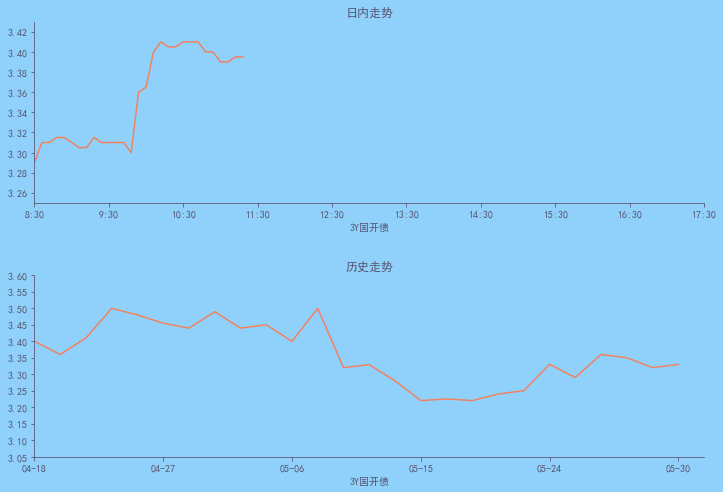

In [147]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(sidebar5, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar4.pack(fill='both', expand=True)
sidebar5.pack(fill='both', expand=True)
sidebar5.add(sidebar6)


for col in ['中介债券', 'CFETS债券', '交易所债券', '成交统计', '利率债基准', '信用债基准', '利率债标局']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '利率债基准':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['国债', '国开债', '非国开']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    if col == '国开债':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
            '6Y', '7Y', '8Y', '9Y', '10Y', '30Y']:
    mainCol = Frame(sidebar3, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar3.add(mainCol)
    if col == '3Y':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['走势', '期限结构']:
    mainCol = Frame(sidebar4, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar4.add(mainCol)
    if col == '走势':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')

mainCol = Frame(sidebar6, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)
data1 = np.array([3.29, 3.31, 3.31, 3.315, 3.315, 3.31, 3.305, 3.305, 3.315, 3.31, 3.31, 3.31,
                  3.31, 3.3, 3.36, 3.365, 3.4, 3.41, 3.405, 3.405, 3.41, 3.41, 3.41, 3.4, 3.4, 3.39, 3.39, 3.395, 3.395])
ax.plot(data1, color='#f2815e')
ax.set_title('日内走势')
ax.set_xlabel('3Y国开债')
ax.set_xlim(0,90)
xindexReset = np.arange(0, 100, 10)
ax.set_xticks(xindexReset);
xlabelReset = ['8:30', '9:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30', '16:30', '17:30']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(3.25, 3.43)
yindexReset = np.arange(3.26, 3.42, 0.02)
ax.set_yticks(yindexReset)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
axisColor = '#585570'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor)

ax = fig.add_subplot(212)
data1 = np.array([3.4, 3.36, 3.41, 3.5, 3.48, 3.455, 3.44, 3.49, 3.44, 3.45, 3.4, 3.5, 3.32, 3.329, 3.28, 3.22, 3.225,
                  3.22, 3.24, 3.25, 3.33, 3.29, 3.36, 3.35, 3.32, 3.33])
ax.plot(data1, color='#f2815e')
ax.set_title('历史走势')
ax.set_xlabel('3Y国开债')
ax.set_xlim(0,26)
xindexReset = np.arange(0, 30, 5)
ax.set_xticks(xindexReset);
xlabelReset = ['04-18', '04-27', '05-06', '05-15', '05-24', '05-30']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(3.05, 3.6)
yindexReset = np.arange(3.05, 3.6, 0.05)
ax.set_yticks(yindexReset)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
axisColor = '#585570'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor)

plt.subplots_adjust(hspace=0.4)
    
canvas = FigureCanvasTkAgg(fig, master=mainCol)
canvas.get_tk_widget().pack(fill='x')
canvas.draw()
    
window.mainloop()

#### 债券期限结构

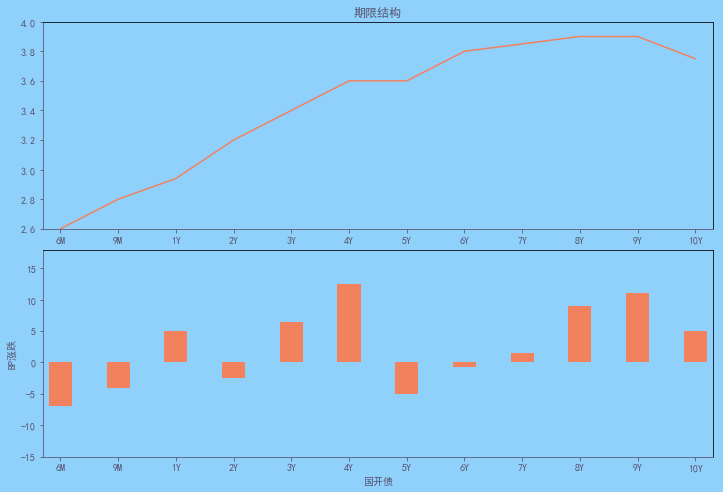

In [178]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(sidebar5, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar4.pack(fill='both', expand=True)
sidebar5.pack(fill='both', expand=True)
sidebar5.add(sidebar6)


for col in ['中介债券', 'CFETS债券', '交易所债券', '成交统计', '利率债基准', '信用债基准', '利率债标局']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '利率债基准':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['国债', '国开债', '非国开']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    if col == '国开债':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y',
            '6Y', '7Y', '8Y', '9Y', '10Y', '30Y']:
    mainCol = Frame(sidebar3, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar3.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['走势', '期限结构']:
    mainCol = Frame(sidebar4, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar4.add(mainCol)
    if col == '期限结构':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')

mainCol = Frame(sidebar6, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
data1 = np.array([2.6, 2.8, 2.94, 3.2, 3.4, 3.6, 3.6, 3.8, 3.85, 3.9, 3.9, 3.75])
ax1.plot(data1, color='#f2815e')
ax1.set_title('期限结构')
ax1.set_xlim(-0.3,11.3)
xindexReset = np.arange(0, 12, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y']
ax1.set_xticklabels(xlabelReset)
ax1.set_ylim(2.6, 4.0)
yindexReset = np.arange(2.6, 4.2, 0.2)
ax1.set_yticks(yindexReset)

ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
ax1isColor = '#585570'
ax1.spines['bottom'].set_color(axisColor)
ax1.spines['left'].set_color(axisColor)
ax1.tick_params(axis='x', colors=axisColor)
ax1.tick_params(axis='y', colors=axisColor)
ax1.yaxis.label.set_color(axisColor)
ax1.xaxis.label.set_color(axisColor)
ax1.title.set_color(axisColor)

ax2 = fig.add_subplot(212)
data1 = np.array([-7, -4, 5, -2.5, 6.5, 12.5, -5, -0.8, 1.5, 9, 11, 5])
index1 = np.arange(0, 12, 1)
ax2.bar(index1, data1, 0.4, color='#f2815e')
ax2.set_xlabel('国开债')
ax2.set_ylabel('BP涨跌')
ax2.set_xlim(-0.3,11.3)
xindexReset = np.arange(0, 12, 1)
ax2.set_xticks(xindexReset)
xlabelReset = ['6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y']
ax2.set_xticklabels(xlabelReset)
ax2.set_ylim(-10, 18)
yindexReset = np.arange(-15, 20, 5)
ax2.set_yticks(yindexReset)

ax2.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
ax2isColor = '#585570'
ax2.spines['bottom'].set_color(axisColor)
ax2.spines['left'].set_color(axisColor)
ax2.tick_params(axis='x', colors=axisColor)
ax2.tick_params(axis='y', colors=axisColor)
ax2.yaxis.label.set_color(axisColor)
ax2.xaxis.label.set_color(axisColor)
ax2.title.set_color(axisColor)

plt.subplots_adjust(hspace=0.1)
    
canvas = FigureCanvasTkAgg(fig, master=mainCol)
canvas.get_tk_widget().pack(fill='x')
canvas.draw()
    
window.mainloop()

#### ABS计算器

In [368]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')

for col in ['市场概况', '一级市场', '二级市场', '信用债研究', '可转债研究', '资产支持证券',
            '央行动态', '机构研究', '国债期货', '海外债券']:
    mainCol = Frame(sidebar4, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar4.add(mainCol)
    if col == '资产支持证券':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')


main.pack(fill='both', expand=True)
main.add(sidebar4)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
# main.add(sidebar5)

# sidebar1.pack(fill='both', expand=True)
# sidebar2.pack(fill='both', expand=True)
# sidebar3.pack(fill='both', expand=True)
# sidebar4.pack(fill='both', expand=True)
# sidebar5.pack(fill='both', expand=True)

mainCol = Frame(sidebar1, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='价格/收益率 分析', fg='#585570', bg='#90d1fc', anchor='w')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='假设项', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in ['提前还款单元(年提前还款率CPR%)', '违约率(年违约率CDR%)', '严重度(%)']:
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#90d1fc')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='场景1', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in [0, 0, 100]:
    entry1 = Entry(mainCol, show='', relief=GROOVE, font=('Verdana',12))
    entry1.config(fg='#d1d1d1')
    entry1.insert(-1, col)
    entry1.pack(fill='x')
    
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='场景2', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in [0, 0, 100]:
    entry1 = Entry(mainCol, show='', relief=GROOVE, font=('Verdana',12))
    entry1.config(fg='#d1d1d1')
    entry1.insert(-1, col)
    entry1.pack(fill='x')
    
mainCol = Frame(sidebar2, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar2.add(mainCol)
label = Label(mainCol, text='场景3', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in [0, 0, 100]:
    entry1 = Entry(mainCol, show='', relief=GROOVE, font=('Verdana',12))
    entry1.config(fg='#d1d1d1')
    entry1.insert(-1, col)
    entry1.pack(fill='x')
    
    
mainCol = Frame(sidebar3, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar3.add(mainCol)
label = Label(mainCol, text='价格/收益率 分析', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')

mainCol = Frame(sidebar3, borderwidth=2, bg='#90d1fc')
mainCol.pack(expand=True, fill='both')
sidebar3.add(mainCol)
label = Label(mainCol, text='计算', fg='#f7fafc', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in ['价格', '收益率', '加权平均剩余期限', '本金窗口期', '本金总额', '利息总额', '现金流总额']:
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#90d1fc')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for i in range(3):
    mainCol = Frame(sidebar3, borderwidth=2, bg='#90d1fc')
    mainCol.pack(expand=True, fill='both')
    sidebar3.add(mainCol)
    label = Label(mainCol, text='', fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    for k in range(7):
        entry1 = Entry(mainCol, show='', font=('Verdana',12), relief=GROOVE)
        entry1.config(fg='#d1d1d1')
        entry1.pack(fill='x')

    
window.mainloop()

#### 债券新闻

In [322]:
window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

pw = PanedWindow(orient="vertical")
pw1 = PanedWindow(pw, orient="horizontal")
pw2 = PanedWindow(pw, orient="horizontal")
pw.pack(fill="both", expand=True)
pw.add(pw1)
pw.add(pw2)

main1 = PanedWindow(pw2, orient="vertical")
sidebar1 = PanedWindow(pw2, orient="vertical")
sidebar2 = PanedWindow(pw2, orient="horizontal", bg='#90d1fc')
main1.pack(fill="both", expand=True)
main1.add(sidebar1)
main1.add(sidebar2)

main2 = PanedWindow(pw2, orient="vertical", bg='#90d1fc')
sidebar3 = PanedWindow(pw2, orient="horizontal")
sidebar4 = PanedWindow(pw2, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(pw2, orient="horizontal")
sidebar6 = PanedWindow(pw2, orient="horizontal", bg='#90d1fc')
main2.pack(fill="both", expand=True)
main2.add(sidebar3)
main2.add(sidebar4)
main2.add(sidebar5)
main2.add(sidebar6)

pw1.pack(fill="both", expand=True)
pw2.pack(fill="both", expand=True)
pw2.add(main1)
pw2.add(main2)

for col in ['债券新闻', '债券研报', '债市日历', '中国价格监控', '基准利率速览', '央行动态']:
    mainCol = Frame(pw1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    pw1.add(mainCol)
    if col == '债券新闻':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')

mainCol1 = Frame(sidebar1, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar1.add(mainCol1)
entry1 = Entry(mainCol1, show='')
entry1Start = 100
entry1.place(x=entry1Start, y=5, width=250)
entry1.config(fg='#d1d1d1')
entry1.insert(0, '请输入关键字')
button1 = Button(mainCol1, text='搜索', fg='#f4f4f4', bg='#90d1fc')
button1.place(x=entry1Start + 260, y=2)

mainCol1 = Frame(sidebar2, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
for col in ['19:45', '19:42', '19:39', '19:36', '19:36', '19:31', '19:24',
            '19:22', '19:22', '19:22', '19:14', '19:01', '19:00', '18:59',
            '18:58', '18:57']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar2, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
for col in ['*ST北讯：公司控股股东龙跃实业集团被列入失信被执行人', '摩根士丹利：建议减持墨西哥比索并出售该国债券',
            '印度十年期国债收益率本周跌19个基点，创2018年12月19日来最大周度跌幅', '联合评级：将中天钢铁主体长期信用等级由"AA"上调至"AA+"',
            '国购投资：公司新增5起金额较大的诉讼案件', '盛运环保：公司股票存在重大违法强制退市或被暂停上市的风险',
            '意大利五星运动党支持民主联盟有关通过赤字来为“统一税”提供资金支持的计划', '上交所对富贵鸟等公司债券发行人予以通报批评',
            '019年6月至9月，印度每月将发行主权黄金债券', '光大银行：督促永泰能源尽快制定债券偿还计划',
            '大公国际：持续关注“16凯迪债”无法按时付息', '意大利财政部：意大利无须发行“迷你国债”也可以偿还债务',
            '广东省广业集团：公司高级管理人员涉嫌违法违纪被调查', '成都经济技术开发区建设发展有限公司：出售、转让资产完成工商变更登记',
            '广州医药集团：公司副董事长、总经理陈矛先生辞职', '中诚信国际关注辽宁方大控股上市公司方大特钢发生安全生产事故']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar3, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar3.add(mainCol1)
label1 = Label(mainCol1, text='阅读排行', fg='#585570', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')

mainCol1 = Frame(sidebar4, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
for col in [1,2,3,4,5,6]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar4, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar4.add(mainCol1)
for col in ['离岸人民币兑美元跌破6.94关口', '千亿合资基金公司“换帅”，前5月竟有25家基金老总变更，历史罕见！',
            '银保监会：正式批准华夏银行发行不超过400亿元无固定期限资本债券', '北向资金5月净流出536.73亿元创历史新高，后市长线资金仍可期待',
            '中金所将对股指期货实施跨品种单向大边保证金制度', '证监会：对6宗案件做出行政处罚']:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar5, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar5.add(mainCol1)
label1 = Label(mainCol1, text='财经日历', fg='#585570', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')

mainCol1 = Frame(sidebar6, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f4f4f4', bg='#85c3ea', height=1)
label1.config(font=("System", 5))
label1.pack(fill='x')
for col in ['07:00', '07:00', '07:30', '07:30', '07:50', '07:50', '07:50', '07:50']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='地点', fg='#f4f4f4', bg='#85c3ea', height=1)
label1.config(font=("System", 5))
label1.pack(fill='x')
for col in ['韩国', '韩国', '日本', '日本', '日本', '日本', '日本', '日本']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc', borderwidth=2)
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='事件', fg='#f4f4f4', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 5))
label1.pack(fill='x')
for col in ['工业生产指数:环比(%)', '工业生产指数:同比(%)', '失业率(%)', '生产者产成品库存指数:环比(%)',
            '工业生产指数:环比(%)', '工业生产指数:同比(%)', 'CPI:东京都区部:环比(%)', 'CPI:东京都区部:同比(%)']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

#### 专题统计:一级市场

#### 分类发行规模

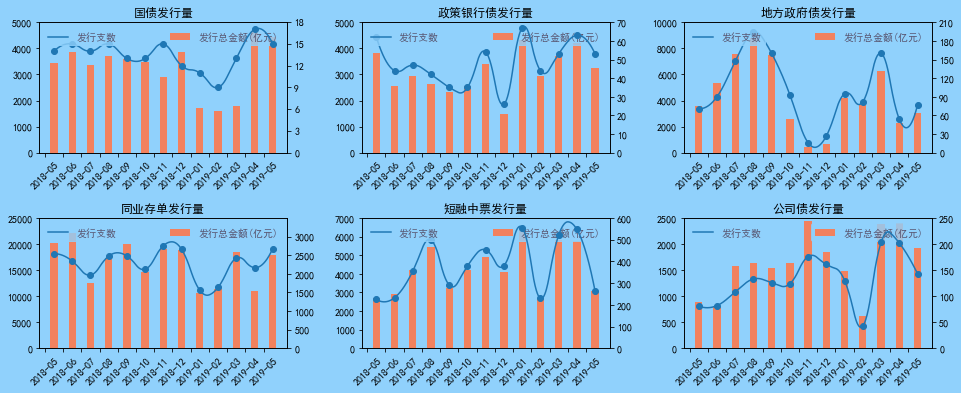

In [241]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(sidebar5, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar4.pack(fill='both', expand=True)
sidebar5.pack(fill='both', expand=True)
sidebar5.add(sidebar6)


for col in ['市场概况', '一级市场', '二级市场', '信用债研究', '可转债研究', '资产支持证券',
            '央行动态', '机构研究', '国债期货', '海外债券']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '一级市场':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['一级市场总览', '发行利率走势', '分类发行规模', '发行统计', '承销排行榜']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    if col == '分类发行规模':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
mainCol = Frame(sidebar6, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar6.add(mainCol)

readPath = r'D:\Dropbox (study-int)\Personal - Kevin\Python Scripts\Study\Study28 - Data Analysis Software'
data = pd.read_excel(os.path.join(readPath, 'bond1.xlsx'))
data.columns = ['startDate', 'endDate', 'amount', 'trade', 'people']

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(231)
data1 = data['amount'].values[0:13][::-1]
data2 = data['trade'].values[0:13][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('国债发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 5000)
yindexReset = np.arange(0, 6000, 1000)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 18)
yindexReset = np.arange(0, 21, 3)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)


ax1 = fig.add_subplot(232)
data1 = data['amount'].values[13:26][::-1]
data2 = data['trade'].values[13:26][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('政策银行债发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 5000)
yindexReset = np.arange(0, 6000, 1000)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 70)
yindexReset = np.arange(0, 80, 10)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)


ax1 = fig.add_subplot(233)
data1 = data['amount'].values[26:39][::-1]
data2 = data['trade'].values[26:39][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('地方政府债发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 10000)
yindexReset = np.arange(0, 12000, 2000)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 210)
yindexReset = np.arange(0, 240, 30)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)


ax1 = fig.add_subplot(234)
data1 = data['amount'].values[39:52][::-1]
data2 = data['trade'].values[39:52][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('同业存单发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 25000)
yindexReset = np.arange(0, 30000, 5000)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 3500)
yindexReset = np.arange(0, 3500, 500)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

ax1 = fig.add_subplot(235)
data1 = data['amount'].values[52:65][::-1]
data2 = data['trade'].values[52:65][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('短融中票发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 7000)
yindexReset = np.arange(0, 8000, 1000)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 600)
yindexReset = np.arange(0, 700, 100)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

ax1 = fig.add_subplot(236)
data1 = data['amount'].values[65:78][::-1]
data2 = data['trade'].values[65:78][::-1]
index1 = np.arange(0, 13, 1) + 0.5
ax1.bar(index1, data1, 0.4, color='#f2815e', label='发行总金额(亿元)')
ax1.set_title('公司债发行量')
ax1.set_xlim(-0.3,13.3)
xindexReset = np.arange(0, 13, 1)
ax1.set_xticks(xindexReset)
xlabelReset = ['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10',
               '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05']
ax1.set_xticklabels(xlabelReset, rotation=45)
ax1.set_ylim(0, 2500)
yindexReset = np.arange(0, 3000, 500)
ax1.set_yticks(yindexReset)
legend = plt.legend(frameon = 1, loc=1)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

indexNew = np.linspace(index1.min(), index1.max(),500)
f = interp1d(index1, data2, kind='quadratic')
data2Smooth=f(indexNew)
ax2 = ax1.twinx()
ax2.plot(indexNew, data2Smooth, label='发行支数')
ax2.scatter(index1, data2)
ax2.set_ylim(0, 250)
yindexReset = np.arange(0, 300, 50)
ax2.set_yticks(yindexReset)
ax1.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(frameon = 1, loc=2)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
canvas = FigureCanvasTkAgg(fig, master=mainCol)
canvas.get_tk_widget().pack(fill='x')
canvas.draw()
    
window.mainloop()

#### 发型统计

NameError: name 'axisColor' is not defined

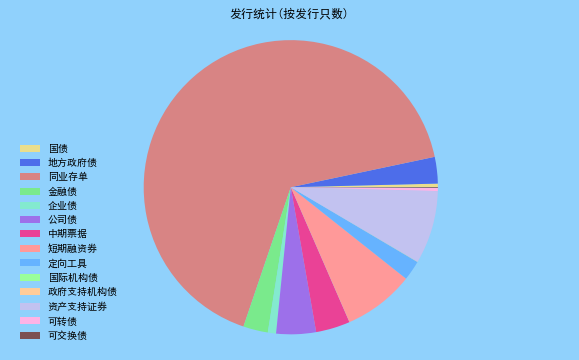

In [8]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal")
sidebar6 = PanedWindow(sidebar5, orient="horizontal", bg='#90d1fc')
sidebar7 = PanedWindow(sidebar5, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar4.pack(fill='both', expand=True)
sidebar5.pack(fill='both', expand=True)
sidebar5.add(sidebar6)
sidebar5.add(sidebar7)


for col in ['市场概况', '一级市场', '二级市场', '信用债研究', '可转债研究', '资产支持证券',
            '央行动态', '机构研究', '国债期货', '海外债券']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '一级市场':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['一级市场总览', '发行利率走势', '分类发行规模', '发行统计', '承销排行榜']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    if col == '发行统计':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    

mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='债券类型', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['国债', '地方政府债', '同业存单', '金融债', '企业债', '公司债', '中期票据',
            '短期融资券', '定向工具', '国际机构债', '政府支持机构债', '资产支持证券', '可转债', '可交换债']:
    label1 = Label(mainCol1, text=col, fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='发行只数', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [162, 1200, 27319, 1115, 371, 1792, 1548, 3205, 897, 6, 9, 3302, 138, 34]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='只数比重%', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['0.39', '2.92', 66.47, 2.71, 0.90, 4.36, 3.77, '7.80', 2.18, 0.01, 0.02, 8.03, 0.34, 0.08]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar6, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar6.add(mainCol1)
label1 = Label(mainCol1, text='发行额(亿元)', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [38981.18, 52633.47, '193170.40', 58760.12, 3054.67, 20010.91, 18745.85, '33834.00', 6230.87,
            '115.00', '930.00', '21990.55', 1991.62, 602.99]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol = Frame(sidebar7, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar7.add(mainCol)

colors = ['#eade8c', '#4d6dea', '#d88484',  '#7aea8c', '#83eacf',  '#9d70ea', '#ea4296', '#ff9999',
          '#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#7c5153']
explode = (0.1, 0, 0, 0, 0, 0)
data1 = np.array([162, 1200, 27319, 1115, 371, 1792, 1548, 3205, 897, 6, 9, 3302, 138, 34])
labels = ['国债', '地方政府债', '同业存单', '金融债', '企业债', '公司债', '中期票据',
            '短期融资券', '定向工具', '国际机构债', '政府支持机构债', '资产支持证券', '可转债', '可交换债']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.pie(data1, colors=colors, labels=None)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
ax.set_title('发行统计(按发行只数)')
ax.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
legend = plt.legend(labels= labels, frameon = 1, loc=3)
frame = legend.get_frame()
frame.set_facecolor('#90d1fc')
frame.set_edgecolor('#90d1fc')
plt.setp(legend.get_texts(), color=axisColor)


canvas = FigureCanvasTkAgg(fig, master=mainCol)
canvas.get_tk_widget().pack(fill='x')
canvas.draw()
    
    
window.mainloop()

#### 承销排行榜

In [ ]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical")
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar3 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar4 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar5 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar6 = PanedWindow(main, orient="horizontal")
sidebar7 = PanedWindow(sidebar6, orient="horizontal", bg='#90d1fc')
sidebar8 = PanedWindow(sidebar6, orient="horizontal", bg='#90d1fc')


main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)
main.add(sidebar3)
main.add(sidebar4)
main.add(sidebar5)
main.add(sidebar6)

sidebar1.pack(fill='both', expand=True)
sidebar2.pack(fill='both', expand=True)
sidebar3.pack(fill='both', expand=True)
sidebar4.pack(fill='both', expand=True)
sidebar5.pack(fill='both', expand=True)
sidebar6.pack(fill='both', expand=True)
sidebar6.add(sidebar7)
sidebar6.add(sidebar8)


for col in ['市场概况', '一级市场', '二级市场', '信用债研究', '可转债研究', '资产支持证券',
            '央行动态', '机构研究', '国债期货', '海外债券']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    if col == '一级市场':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['一级市场总览', '发行利率走势', '分类发行规模', '发行统计', '承销排行榜']:
    mainCol = Frame(sidebar2, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar2.add(mainCol)
    if col == '承销排行榜':
        label = Label(mainCol, text=col, fg='#585570', bg='#85c3ea')
    else:
        label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
for col in ['2019年至今承销排名', '2019年4月承销排名']:
    mainCol = Frame(sidebar5, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar5.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')
    
mainCol1 = Frame(sidebar7, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar7.add(mainCol1)
label1 = Label(mainCol1, text='排名', fg='#f7fafc', bg='#85c3ea', height=1)
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar7, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar7.add(mainCol1)
label1 = Label(mainCol1, text='机构名称', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['中国建设银行股份有限公司', '兴业银行股份有限公司', '中国民生银行股份有限公司', '中国工商银行股份有限公司',
 '招商银行股份有限公司', '中国银行股份有限公司', '中信银行股份有限公司', '上海浦东发展银行股份有限公司',
 '中国光大银行股份有限公司', '中国农业银行股份有限公司']:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar7, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar7.add(mainCol1)
label1 = Label(mainCol1, text='金额(亿元)', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [2110.69, 2094.66, 1915.53, 1832.22, 1769.52, 1765.43, 1730.57, 1688.19, 1521.73, 1486.57]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')    
    
mainCol1 = Frame(sidebar8, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar8.add(mainCol1)
label1 = Label(mainCol1, text='排名', fg='#f7fafc', bg='#85c3ea', height=1)
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [1,2,3,4,5,6,7,8,9,10]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar8, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar8.add(mainCol1)
label1 = Label(mainCol1, text='机构名称', fg='#f7fafc', bg='#85c3ea', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['兴业银行股份有限公司', '中国民生银行股份有限公司',  '中国建设银行股份有限公司', '中国光大银行股份有限公司',
'中国银行股份有限公司', '上海浦东发展银行股份有限公司', '中信银行股份有限公司', '招商银行股份有限公司',
'中国工商银行股份有限公司', '交通银行股份有限公司']:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar8, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar8.add(mainCol1)
label1 = Label(mainCol1, text='金额(亿元)', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in [532.59, 523.93, 502.26, 498, 447.8, 421.5, 412.98, 325.34, 267.49, 253.8]:
    label1 = Label(mainCol1, text=str(col), fg='#f4f4f4', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar8, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar8.add(mainCol1)
label1 = Label(mainCol1, text='变动', fg='#f7fafc', bg='#85c3ea', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['-', '↑', '↑', '↑', '↑', '↓', '↓', '-', '-', '↑'],
                      ['#f4f4f4', '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51',
                       '#5dad16', '#5dad16', '#f4f4f4', '#f4f4f4', '#ed6b51']):
    label1 = Label(mainCol1, text=str(col), fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

    
window.mainloop()

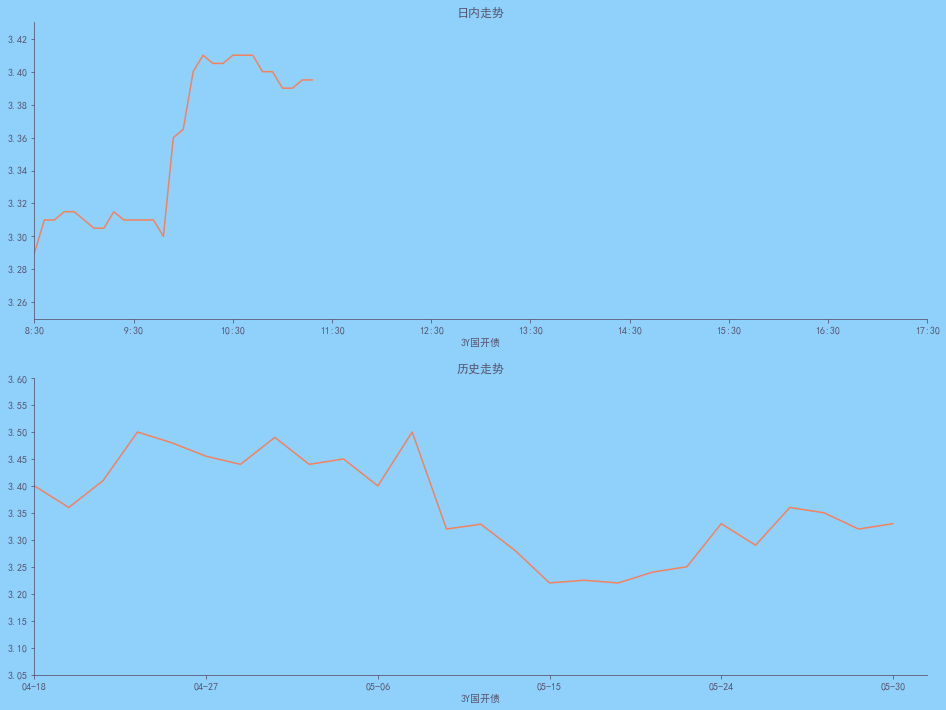

In [143]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(211)
data1 = np.array([3.29, 3.31, 3.31, 3.315, 3.315, 3.31, 3.305, 3.305, 3.315, 3.31, 3.31, 3.31,
                  3.31, 3.3, 3.36, 3.365, 3.4, 3.41, 3.405, 3.405, 3.41, 3.41, 3.41, 3.4, 3.4, 3.39, 3.39, 3.395, 3.395])
ax.plot(data1, color='#f2815e')
ax.set_title('日内走势')
ax.set_xlabel('3Y国开债')
ax.set_xlim(0,90)
xindexReset = np.arange(0, 100, 10)
ax.set_xticks(xindexReset);
xlabelReset = ['8:30', '9:30', '10:30', '11:30', '12:30', '13:30', '14:30', '15:30', '16:30', '17:30']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(3.25, 3.43)
yindexReset = np.arange(3.26, 3.42, 0.02)
ax.set_yticks(yindexReset)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
axisColor = '#585570'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor)

ax = fig.add_subplot(212)
data1 = np.array([3.4, 3.36, 3.41, 3.5, 3.48, 3.455, 3.44, 3.49, 3.44, 3.45, 3.4, 3.5, 3.32, 3.329, 3.28, 3.22, 3.225,
                  3.22, 3.24, 3.25, 3.33, 3.29, 3.36, 3.35, 3.32, 3.33])
ax.plot(data1, color='#f2815e')
ax.set_title('历史走势')
ax.set_xlabel('3Y国开债')
ax.set_xlim(0,26)
xindexReset = np.arange(0, 30, 5)
ax.set_xticks(xindexReset);
xlabelReset = ['04-18', '04-27', '05-06', '05-15', '05-24', '05-30']
ax.set_xticklabels(xlabelReset)
ax.set_ylim(3.05, 3.6)
yindexReset = np.arange(3.05, 3.6, 0.05)
ax.set_yticks(yindexReset)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#90d1fc')
fig.patch.set_facecolor('#90d1fc')
axisColor = '#585570'
ax.spines['bottom'].set_color(axisColor)
ax.spines['left'].set_color(axisColor)
ax.tick_params(axis='x', colors=axisColor)
ax.tick_params(axis='y', colors=axisColor)
ax.yaxis.label.set_color(axisColor)
ax.xaxis.label.set_color(axisColor)
ax.title.set_color(axisColor);

#### 债券新闻

In [ ]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *
import ttk

window= Tk()
window.title("佳期技术债券分析系统")

menu_widget = Menu(window)
menu_widget.add_command(label="债券市场")
menu_widget.add_command(label="市场资讯")
menu_widget.add_command(label="衍生品市场")
menu_widget.add_command(label="数据专题")
menu_widget.add_command(label="统计信息")
window.config(menu=menu_widget)

main = PanedWindow(orient="vertical", bg='#90d1fc')
sidebar1 = PanedWindow(main, orient="horizontal", bg='#90d1fc')
sidebar2 = PanedWindow(main, orient="horizontal", bg='#90d1fc')

main.pack(fill='both', expand=True)
main.add(sidebar1)
main.add(sidebar2)

mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
mainCol.pack(expand=True, fill='both')
sidebar1.add(mainCol)
label = Label(mainCol, text='债券新闻', fg='#585570', bg='#85c3ea')
label.config(font=("System", 4))
label.pack(fill='x')
for col in ['债券研报', '债市日历', '中国价格监控', '基准利率速览', '央行动态']:
    mainCol = Frame(sidebar1, borderwidth=2, bg='#85c3ea')
    mainCol.pack(expand=True, fill='both')
    sidebar1.add(mainCol)
    label = Label(mainCol, text=col, fg='#f7fafc', bg='#85c3ea')
    label.config(font=("System", 4))
    label.pack(fill='x')


mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='基金成立日', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['180021', '190006', '170012', '180027', '190004', '190001', '190003', '180014', '180028', '170020']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='名称', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['18附息国债21', '19附息国债06', '17附息国债12', '18附息国债27', '19附息国债04', '19附息国债01',
            '19附息国债03', '18附息国债14', '18附息国债28', '17附息国债20']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='剩余年限', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['2.37', '9.98', '0.04', '9.48', '4.87', '0.64', '2.77', '2.10', '6.52', '5.31']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='最新净价', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['100.5986', '100.0840', '100.0552', '99.7567', '100.5513',
                       '99.8371', '99.3900', '100.8191', '99.4669', '102.6886'],
                      ['#f7fafc', '#ed6b51', '#5dad16', '#ed6b51', '#ed6b51',
                       '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')

mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='成交量(万)', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['592000', '557000', '529000', '364400', '361400',
            '304000', '293600', '263000', '260240', '254000']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='最新YTM', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['2.9000', '3.2800', '2.1992', '3.2800', '3.0650',
                       '2.5499', '2.9200', '2.8300', '3.3100', '3.1300'],
                      ['#f7fafc', '#5dad16', '#ed6b51', '#5dad16', '#5dad16',
                       '#5dad16', '#5dad16', '#5dad16', '#5dad16', '#5dad16',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='涨跌幅', fg='#f7fafc', bg='#90d1fc', height=1, anchor='e')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col, color in zip(['0.00%', '0.08%', '-0.01%', '0.08%', '0.13%',
                       '0.02%', '0.01%', '0.08%', '0.09%', '0.29%'],
                      ['#f7fafc', '#ed6b51', '#5dad16', '#ed6b51', '#ed6b51',
                       '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51', '#ed6b51',]):
    label1 = Label(mainCol1, text=col, fg=color, bg='#90d1fc', anchor='e')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
mainCol1 = Frame(sidebar2, bg='#90d1fc')
mainCol1.pack(expand=True, fill='both')
sidebar2.add(mainCol1)
label1 = Label(mainCol1, text='时间', fg='#f7fafc', bg='#90d1fc', height=1, anchor='w')
label1.config(font=("System", 6))
label1.pack(fill='x')
for col in ['17:16', '17:16', '17:16', '17:16', '17:16',
            '17:16', '17:16', '17:16', '17:16', '17:16']:
    label1 = Label(mainCol1, text=col, fg='#f7fafc', bg='#90d1fc', anchor='w')
    label1.config(font=("System", 4))
    label1.pack(fill='x')
    
window.mainloop()

#### 资金综合屏

#### 利率走势分析

#### 市场概况